**Data Visualization and Preparation**

In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=',')

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


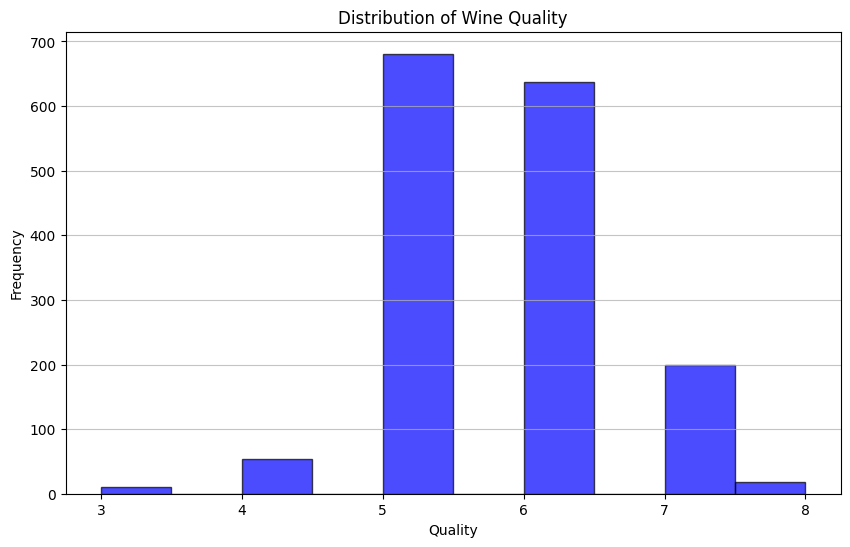

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df.get('quality'), bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(np.arange(3, 9, 1))  # Quality usually ranges from 3 to 8
plt.grid(axis='y', alpha=0.75)
plt.show()

In [159]:
#split dataset to train set and test set
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree**

In [79]:
class Node():
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature  # Feature index
        self.threshold = threshold  # Threshold value
        self.left = left  # Left child node
        self.right = right  # Right child node
        self.value = value  # Value for leaf nodes

In [113]:
class DecisionTreeRegression:
    def __init__(self, X, y, max_depth=None):
        self.max_depth = max_depth
        self.root = self.build_tree(X, y)
    
    def calculate_info_gain(self, y, y_left, y_right):
        total_variance = np.var(y) * len(y)
        left_variance = np.var(y_left) * len(y_left)
        right_variance = np.var(y_right) * len(y_right)
        info_gain = total_variance - (left_variance + right_variance)
        return info_gain
    
    def best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None
        
        n_samples, n_features = X.shape
        
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold
                
                if np.any(left_indices) and np.any(right_indices):
                    y_left = y[left_indices]
                    y_right = y[right_indices]
                    gain = self.calculate_info_gain(y, y_left, y_right)
                    
                    if gain > best_gain:
                        best_gain = gain
                        best_feature = feature
                        best_threshold = threshold
        
        return best_feature, best_threshold
    
    def split(self, X, y, feature, threshold):
        left_indices = X[:, feature] <= threshold
        right_indices = X[:, feature] > threshold
        
        left_node = Node(feature=feature, threshold=threshold)
        right_node = Node(feature=feature, threshold=threshold)
        
        left_node.value = np.mean(y[left_indices])
        right_node.value = np.mean(y[right_indices])
        
        return left_indices, right_indices

    def build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            leaf_node = Node(value=np.mean(y))
            print(f"🌳 Leaf node at depth {depth}: Predict {leaf_node.value:.4f}")
            return leaf_node

        best_feature, best_threshold = self.best_split(X, y)

        left_indices, right_indices = self.split(X, y, best_feature, best_threshold)
        x_left = X[left_indices]
        y_left = y[left_indices]
        x_right = X[right_indices]
        y_right = y[right_indices]

        left_node = self.build_tree(x_left, y_left, depth + 1)
        right_node = self.build_tree(x_right, y_right, depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left_node, right=right_node)
    
    def predict(self, X):
        predictions = []
        for i, sample in enumerate(X):
            node = self.root
            depth = 0
            while node.value is None:
                indent = "  " * depth
                if sample[node.feature] <= node.threshold:
                    node = node.left
                else:
                    node = node.right
                depth += 1
            predictions.append(node.value)
        return np.array(predictions)

In [160]:
decision_tree = DecisionTreeRegression(X_train.values, y_train.values, max_depth=5)
y_pred = decision_tree.predict(X_test.values)

🌳 Leaf node at depth 5: Predict 5.0323
🌳 Leaf node at depth 5: Predict 5.2548
🌳 Leaf node at depth 4: Predict 3.0000
🌳 Leaf node at depth 3: Predict 3.0000
🌳 Leaf node at depth 5: Predict 5.0000
🌳 Leaf node at depth 5: Predict 5.6216
🌳 Leaf node at depth 5: Predict 6.1311
🌳 Leaf node at depth 5: Predict 5.1429
🌳 Leaf node at depth 5: Predict 3.0000
🌳 Leaf node at depth 5: Predict 5.5097
🌳 Leaf node at depth 5: Predict 5.0000
🌳 Leaf node at depth 5: Predict 5.3220
🌳 Leaf node at depth 5: Predict 6.1875
🌳 Leaf node at depth 5: Predict 4.0000
🌳 Leaf node at depth 5: Predict 5.1316
🌳 Leaf node at depth 5: Predict 5.6122
🌳 Leaf node at depth 5: Predict 4.0000
🌳 Leaf node at depth 5: Predict 5.0000
🌳 Leaf node at depth 4: Predict 3.0000
🌳 Leaf node at depth 5: Predict 6.3243
🌳 Leaf node at depth 5: Predict 5.9487
🌳 Leaf node at depth 5: Predict 5.9231
🌳 Leaf node at depth 5: Predict 5.1765
🌳 Leaf node at depth 5: Predict 6.8667
🌳 Leaf node at depth 5: Predict 6.0750
🌳 Leaf node at depth 5: P

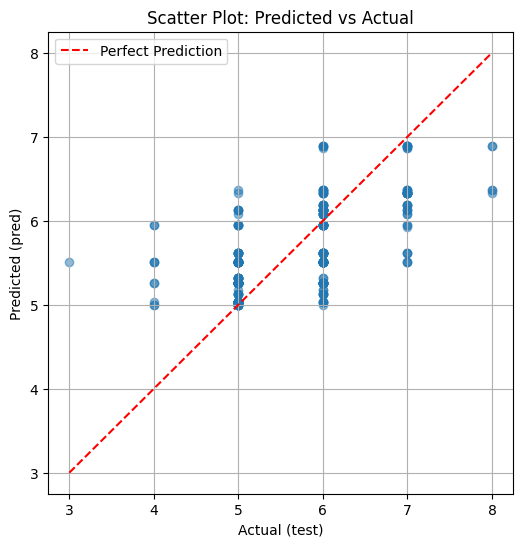

In [161]:
import matplotlib.pyplot as plt
test = y_test.values
pred = y_pred
plt.figure(figsize=(6, 6))
plt.scatter(test, pred, alpha=0.5)
plt.plot([min(test), max(test)], [min(test), max(test)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual (test)')
plt.ylabel('Predicted (pred)')
plt.title('Scatter Plot: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()


In [162]:
#Calculate errors
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.4093
Mean Absolute Error: 0.4917
R² Score: 0.3737


**Sklearn Decision Tree**

In [108]:
#use decision tree of sklearn
from sklearn.tree import DecisionTreeRegressor
decision_tree_sklearn = DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree_sklearn.fit(X_train, y_train)
y_pred_sklearn = decision_tree_sklearn.predict(X_test)

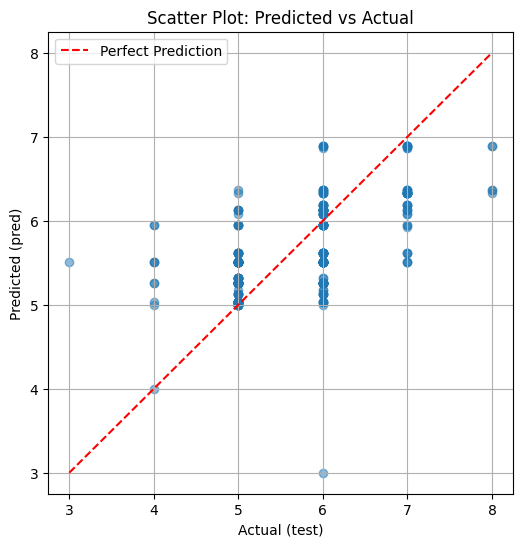

In [163]:
import matplotlib.pyplot as plt
test = y_test.values
pred = y_pred_sklearn
plt.figure(figsize=(6, 6))
plt.scatter(test, pred, alpha=0.5)
plt.plot([min(test), max(test)], [min(test), max(test)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual (test)')
plt.ylabel('Predicted (pred)')
plt.title('Scatter Plot: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [164]:
#Calculate errors
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred_sklearn)
mae = mean_absolute_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.4335
Mean Absolute Error: 0.4964
R² Score: 0.3366
